In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()
measurement = Base.classes.measurement
station = Base.classes.station
session = Session(engine)

first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdee66dfb20>,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [8]:
first_row_1 = session.query(measurement).first()
first_row_1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fdee387a2b0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

# Exploratory Climate Analysis

<AxesSubplot:title={'center':'plot the data'}>

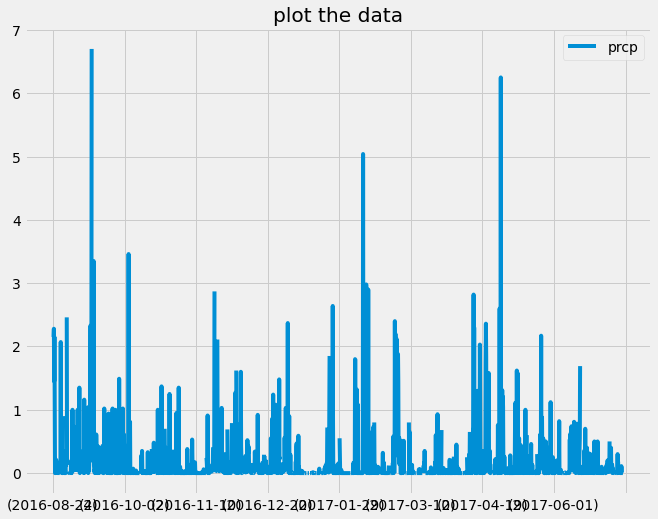

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.prcp).filter((measurement.date>'2016-08-23') & (measurement.date<'2017-07-10')).all()
date = session.query(measurement.date).filter((measurement.date>'2016-08-23') & (measurement.date<'2017-07-10')).all()
date = pd.Series(date)


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores_df = pd.DataFrame(prcp_scores).set_index(date).sort_index()
prcp_scores_df

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_df.plot(title="plot the data", figsize=(10,8), legend=True)


In [10]:
date[0]

('2016-08-24',)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores_df.sum()

prcp    329.36
dtype: float64

In [12]:
# Design a query to show how many stations are available in this dataset?
total_stations = pd.DataFrame(session.query(measurement.station).all()).count()
print(f"total number of stations are {total_stations}")

total number of stations are station    19550
dtype: int64


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = pd.DataFrame(session.query(measurement.station).all()).value_counts().nlargest(1)
print(f"the most active station is {most_active}")
# List the stations and the counts in descending order.
pd.DataFrame(session.query(measurement.station).all()).value_counts().sort_values(ascending=False)

the most active station is station    
USC00519281    2772
dtype: int64


station    
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp = session.query(func.min(measurement.tobs)).filter(
        (measurement.station == 'USC00519281')).one()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').one()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').one()
print(f"the minimum temperature for station USC00519281 is {min_temp}")
print(f"the maximum temperature for station USC00519281 is {max_temp}")
print(f"the average temperature for station USC00519281 is {avg_temp}")


the minimum temperature for station USC00519281 is (54.0,)
the maximum temperature for station USC00519281 is (85.0,)
the average temperature for station USC00519281 is (71.66378066378067,)


the station with highest number of temperature obserations is ('USC00519397', 87.0) 


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

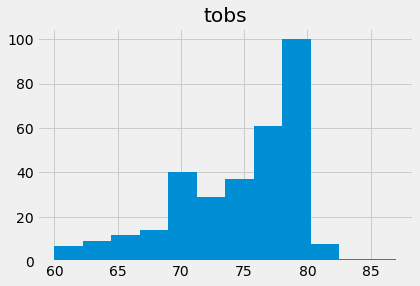

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
higest_temp_station = session.query(measurement.station, func.max(measurement.tobs)).one()
print(f"the station with highest number of temperature obserations is {higest_temp_station} ")
yearly_temp = session.query(measurement.tobs).filter(measurement.station=='USC00519397').filter((measurement.date>='2016-08-23') & (measurement.date<'2017-07-10')).all()
yearly_temp=pd.DataFrame(yearly_temp)
yearly_temp.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
